In [9]:
filedir = '/home/anton/Documents/Tulane/Hackathon'
countName = f'{filedir}/GSE202295_gene_counts.txt'
seriesName = f'{filedir}/GSE202295_series_matrix.txt'

import re
import numpy as np

pat = re.compile('".*" "(.*)" "(.*)" (.*)')

def parseCountsLine(line, pat):
    res = pat.search(line)
    try:
        groups = res.groups()
        counts = [int(c) for c in groups[2].split(' ')]
        return (groups[0], groups[1], counts)
    except Exception as e:
        return None
    
def parseCountsFirstLine(line):
    parts = line.split(' ')
    pat = re.compile('"([^A]+).*"')
    countsMap = {}
    for i in range(2,len(parts)):
        sampleId = pat.search(parts[i]).groups()[0]
        countsMap[sampleId] = i-2
    return countsMap
    
countsAll = []
countNames1 = []
countNames2 = []
countsMap = None

with open(countName, 'r') as f:
    for line in f.readlines():
        res = parseCountsLine(line, pat)
        if res is None:
            countsMap = parseCountsFirstLine(line)
            continue
        n1,n2,counts = res
        countNames1.append(n1)
        countNames2.append(n2)
        countsAll.append(np.array(counts))
        
countsAll = np.stack(countsAll)
print(countsAll.shape)
print('Complete')

(66023, 111)
Complete


In [12]:
import re

diagT2D = None
sampleIds = None
sampleTimes = None
subjIds = None

def parseSeriesLine(line):
    global diagT2D, sampleIds, sampleTimes, subjIds
    parts = line.split('\t')
    if parts[0] == '!Sample_characteristics_ch1':
        pat = re.compile('"diagnosis: ([^"]+)".*')
        if pat.search(parts[1]) is not None:
            diagT2D = [int(pat.search(d).groups()[0] == 'T2D') for d in parts[1:]]
    if parts[0] == '!Sample_title':
        pat = re.compile('"[^\s]+\s\[([^\]]+)\]".*')
        if pat.search(parts[1]) is not None:
            sampleIds = [pat.search(sid).groups()[0] for sid in parts[1:]]
        pat = re.compile('"((?:T2D|NGT?)_\d+)_(\w+).*"')
        if pat.search(parts[1]) is not None:
            sampleTimes = [pat.search(t).groups()[1] for t in parts[1:]]
            subjIds = [pat.search(t).groups()[0] for t in parts[1:]]

with open(seriesName, 'r') as f:
    for line in f.readlines():
        parseSeriesLine(line)
        
print(diagT2D)
print(sampleIds)
print(sampleTimes)
print(subjIds)

[1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1]
['P7401_101', 'P7401_102', 'P7401_103', 'P7401_104', 'P7401_105', 'P7401_106', 'P7401_107', 'P7401_108', 'P7401_109', 'P7401_110', 'P7401_111', 'P7401_112', 'P7401_113', 'P7401_114', 'P7401_118', 'P7401_119', 'P7401_120', 'P7401_121', 'P7401_122', 'P7401_123', 'P7401_124', 'P7401_125', 'P7401_126', 'P7401_127', 'P7401_128', 'P7401_129', 'P7401_130', 'P7401_131', 'P7401_132', 'P7401_133', 'P7401_134', 'P7401_135', 'P7401_136', 'P7401_137', 'P7401_138', 'P7401_139', 'P7401_140', 'P7401_141', 'P7401_142', 'P7401_143', 'P7401_144', 'P7401_145', 'P7401_146', 'P7401_147', 'P7401_148', 'P7401_149', 'P7401_150', 'P7401_151', 'P7401_152', 'P7401_153', 'P7401_154', 'P

In [15]:
for sid in sampleIds:
    print(countsMap[sid], end=' ')

5 17 30 70 50 63 16 69 35 40 58 87 71 61 23 97 29 28 82 60 77 20 21 8 42 22 93 109 91 9 83 95 74 102 53 72 2 54 106 99 37 81 107 24 84 26 94 59 86 36 76 80 92 13 32 14 34 52 45 18 67 12 51 10 100 41 49 101 88 43 79 89 47 27 57 78 64 96 3 98 66 104 68 108 46 25 73 48 62 33 85 39 6 44 103 55 75 65 38 31 105 56 7 0 4 15 1 11 90 19 110 

In [135]:
dataMap = {'T2D': set(), 'NGT': set()}
for i,sid in enumerate(subjIds):
    if sid not in dataMap:
        dataMap[sid] = {}
    dataMap[sid][sampleTimes[i]] = countsAll[:,countsMap[sampleIds[i]]].astype('float32')
    if diagT2D[i] == 1:
        dataMap['T2D'].add(sid)
    else:
        dataMap['NGT'].add(sid)
        
print('Complete')

Complete


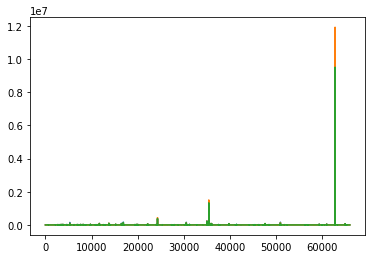

In [136]:
import matplotlib.pyplot as plt

plt.plot(dataMap['NGT_127']['basal'])
plt.plot(dataMap['NGT_127']['post'])
plt.plot(dataMap['NGT_127']['rec'])
plt.show()

In [137]:
import pickle

dictName = f'{filedir}/ImageNomeR/data/omics/T2Dcounts.pkl'

with open(dictName, 'wb') as f:
    pickle.dump(dataMap, f)
    
print('Complete')

Complete


In [214]:
# Random training and test splits

def getSamples(dataMap, timep):
    ngt = []
    t2d = []
    for sid in dataMap['NGT']:
        if timep in dataMap[sid]:
            ngt.append(dataMap[sid][timep])
            sids.append(sid)
    for sid in dataMap['T2D']:
        if timep in dataMap[sid]:
            t2d.append(dataMap[sid][timep])
            sids.append
    return np.stack(ngt), np.stack(t2d)

def getSamplesDiff(dataMap, timep1, timep2):
    ngt = []
    t2d = []
    for sid in dataMap['NGT']:
        if timep1 in dataMap[sid] and timep2 in dataMap[sid]:
            ngt.append(dataMap[sid][timep1]-dataMap[sid][timep2])
    for sid in dataMap['T2D']:
        if timep1 in dataMap[sid] and timep2 in dataMap[sid]:
            t2d.append(dataMap[sid][timep1]-dataMap[sid][timep2])
    return np.stack(ngt), np.stack(t2d)

ngt, t2d = getSamplesDiff(dataMap, 'rec', 'post')
np.random.shuffle(ngt)
np.random.shuffle(t2d)
a = int(3*ngt.shape[0]/4)
b = int(3*t2d.shape[0]/4)
c = ngt.shape[0]-a
d = t2d.shape[0]-b
Xtrain = np.concatenate([ngt[:a], t2d[:b]])
Xtest = np.concatenate([ngt[a:], t2d[b:]])
ytrain = np.concatenate([np.zeros(a), np.ones(b)])
ytest = np.concatenate([np.zeros(c), np.ones(d)])
print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(26, 66023)
(9, 66023)
(26,)
(9,)


In [215]:
# Run a simple analysis

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=10000, C=0.1).fit(Xtrain, ytrain)
# clf = LogisticRegression(max_iter=10000, penalty='elasticnet', solver='saga', C=0.1, l1_ratio=0.5).fit(Xtrain, ytrain)
yhat = clf.predict(Xtest)
print(yhat)
print(sum(yhat == ytest)/len(ytest))

[0. 0. 0. 0. 0. 1. 0. 1. 1.]
0.7777777777777778


In [216]:
print(c)
print(d)
print(max(c,d)/(c+d))

4
5
0.5555555555555556


In [166]:
import base64
import json

jsonCompare = 'rec - post'
jsonAccuracy = sum(yhat == ytest)/len(ytest)
jsonTrain = [12,14]
jsonTest = [4,5]
jsonWeights = clf.coef_.squeeze()
# jsonWeights = base64.b64encode(jsonWeights)
jsonLabels = countNames2

jsonObj = {
    'Compare': jsonCompare,
    'Model': 'Logistic Regression',
    'Accuracy': jsonAccuracy,
    'Train': jsonTrain,
    'Test': jsonTest,
    'Weights': list(jsonWeights),
    'Labels': jsonLabels
}

print(len(json.dumps(jsonObj)))

1923111


In [167]:
import pickle

jsonFilename = f'{filedir}/ImageNomeR/data/omics/dummyOmics1.json'

with open(jsonFilename, 'w') as f:
    json.dump(jsonObj, f)
    
print('Complete')

Complete


In [159]:
print(len(jsonWeights))
print(len(jsonLabels))

66023
66023


In [134]:
type(ngt.astype('float32').dtype)

numpy.dtype[float32]

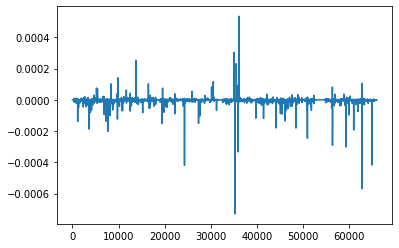

In [147]:
import matplotlib.pyplot as plt 

plt.plot(clf.coef_.squeeze())
plt.show()

In [150]:
a = int(3*ngt.shape[0]/4)
b = int(3*t2d.shape[0]/4)
c = ngt.shape[0]-a
d = t2d.shape[0]-b
print(a,b)
print(c,d)

12 14
4 5


In [151]:
len(countNames2)

66023

In [155]:
str(jsonWeights)

"b'AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA